In [58]:
import numpy as np
from sklearn import datasets
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
iris = datasets.load_iris()         #load dataset with flower characteristics

In [2]:
iris.keys()

dict_keys(['target_names', 'target', 'DESCR', 'data', 'feature_names'])

In [54]:
iris.target_names  #set of 3 target classes

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [53]:
iris['feature_names']    #feature set

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [118]:
#train a logistic regression model to predict which flower given the features. 
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

### Part 1


Binary classification using a logit function. The model can learn between only two different target classes.

In our case choose the two classes {Virginica, Not Virginica}. 

---


In [60]:
data = iris['data']
y = (iris['target']==2).astype(np.int)

#### Part 1.1


Training on a 1 dimensional feature space.

In [114]:
#start with feature sepal length

x = data[:,0].reshape(len(data), 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
log_reg.fit(x_train, y_train)   #fit the logistic regression model.

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

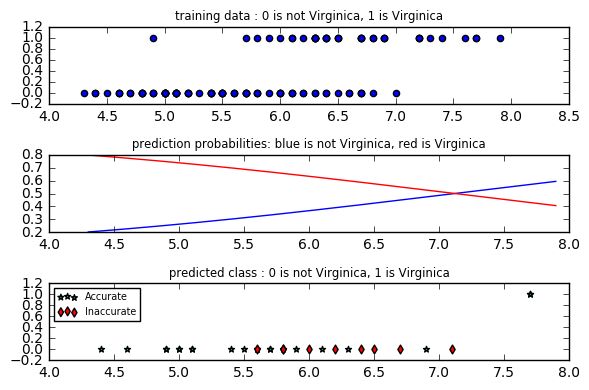

accuracy = 70.0 %


In [115]:
fig = plt.figure()

ax1 = fig.add_subplot(311)
ax1.scatter(x_train, y_train)
ax1.set_title('training data : 0 is not Virginica, 1 is Virginica', fontsize='small')

x_new = np.linspace(x.min(), x.max(), 1000).reshape(-1, 1)
y_prob = log_reg.predict_proba(x_new)

ax2 = fig.add_subplot(312)
ax2.plot(x_new, y_prob[:, 1], 'b-', label='0')
ax2.plot(x_new, y_prob[:, 0], 'r-', label='1')
ax2.set_title('prediction probabilities: blue is not Virginica, red is Virginica', fontsize='small')

y_pred = log_reg.predict(x_test)
ax3 = fig.add_subplot(313)
ax3.scatter(x_test[y_pred==y_test], y_pred[y_pred==y_test], c='c', marker='*', label='Accurate')
ax3.scatter(x_test[y_pred!=y_test], y_pred[y_pred!=y_test], c='r', marker='d', label='Inaccurate')
ax3.legend(loc='upper left', fontsize='x-small')
ax3.set_title('predicted class : 0 is not Virginica, 1 is Virginica', fontsize='small')


fig.tight_layout()
plt.show()

print ('accuracy = %.1f %s'%(100*accuracy_score(y_test, y_pred), '%'))

There is large overlap between classes. You can see this as there is no straight vertical line that can be drawn to cleanly separate the two classes.

In [146]:
#lets try with feature petal width

x = data[:,3].reshape(len(data), 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
log_reg.fit(x_train, y_train)   #fit the logistic regression model.

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

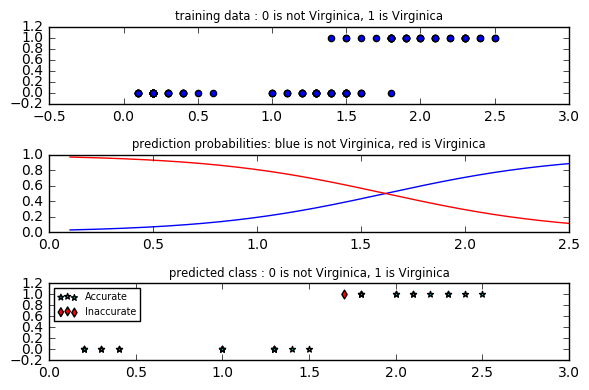

accuracy = 96.7 %


In [147]:
fig = plt.figure()

ax1 = fig.add_subplot(311)
ax1.scatter(x_train, y_train)
ax1.set_title('training data : 0 is not Virginica, 1 is Virginica', fontsize='small')

x_new = np.linspace(x.min(), x.max(), 1000).reshape(-1, 1)
y_prob = log_reg.predict_proba(x_new)

ax2 = fig.add_subplot(312)
ax2.plot(x_new, y_prob[:, 1], 'b-', label='0')
ax2.plot(x_new, y_prob[:, 0], 'r-', label='1')
ax2.set_title('prediction probabilities: blue is not Virginica, red is Virginica', fontsize='small')

y_pred = log_reg.predict(x_test)
ax3 = fig.add_subplot(313)
ax3.scatter(x_test[y_pred==y_test], y_pred[y_pred==y_test], c='c', marker='*', label='Accurate')
ax3.scatter(x_test[y_pred!=y_test], y_pred[y_pred!=y_test], c='r', marker='d', label='Inaccurate')
ax3.legend(loc='upper left', fontsize='x-small')
ax3.set_title('predicted class : 0 is not Virginica, 1 is Virginica', fontsize='small')


fig.tight_layout()
plt.show()

print ('accuracy = %.1f %%'%(100*accuracy_score(y_test, y_pred)))

There is some amount of overlap in this data as well, but much smaller. The model does perform much better. The example shows the importance of selecting the right feature for classification.

---

#### Part 1.2


Training on a multi-dimensional feature space.

In [148]:
x_train, x_test, y_train, y_test = train_test_split(data, y, test_size=0.2)
log_reg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [149]:
y_pred = log_reg.predict(x_test)
print('Weightage for each corresponding feature {0}'.format(log_reg.coef_[0]))
print ('prediction accuracy = %.1f %%'%(100*accuracy_score(y_test, y_pred)))

Weightage for each corresponding feature [-1.55840468 -1.31743794  2.1677906   2.34898716]
prediction accuracy = 100.0 %


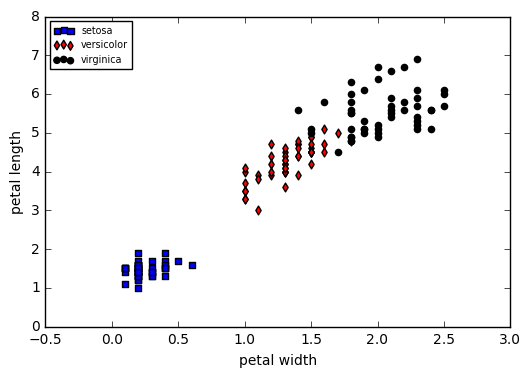

In [167]:
plt.scatter(data[:,3][y==0], data[:,2][y==0], c='b',marker='s', label=iris.target_names[0])
plt.scatter(data[:,3][y==1], data[:,2][y==1], c='r',marker='d', label=iris.target_names[1])
plt.scatter(data[:,3][y==2], data[:,2][y==2], c='k',marker='o', label=iris.target_names[2])
plt.legend(loc='upper left', fontsize='x-small')
plt.xlabel('petal width')
plt.ylabel('petal length')
plt.show()


---
***

### Part 2


Multinomial classification. The model can learn between multiple classes. One approach is to use the logit function for binary classification in an iterative one-versus-rest method. The other approach is to use a generalized multi-dimensional classifier function such as the softmax function.

#### Part 2.1

Multinomial classification using a logit function and a one-vs-rest approach. Essentially, the model will consider each class vs the rest and compute the prediction probability. The class with the highest probability then is chosen. Obviously, the algorithm will slow down as the number of target classes increases.

---

In [173]:
data = iris['data']
y = (iris['target']).astype(np.int)

In [174]:
x_train, x_test, y_train, y_test = train_test_split(data, y, test_size=0.2)
log_reg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [175]:
y_pred = log_reg.predict(x_test)
print('Weightage for each corresponding feature {0}'.format(log_reg.coef_[0]))
print ('prediction accuracy = %.1f %%'%(100*accuracy_score(y_test, y_pred)))

Weightage for each corresponding feature [ 0.3813411   1.38522344 -2.15911941 -0.98927808]
prediction accuracy = 86.7 %



#### Part 2.2

Multinomial classification using a softmax function. The softmax function divides the probability space into k regions corresponding to each and buckets each point into one of the classes based on its softmax-score.

---

In [176]:
x_train, x_test, y_train, y_test = train_test_split(data, y, test_size=0.2)
softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs')
softmax_reg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [177]:
y_pred = softmax_reg.predict(x_test)
print('Weightage for each corresponding feature {0}'.format(softmax_reg.coef_[0]))
print ('prediction accuracy = %.1f %%'%(100*accuracy_score(y_test, y_pred)))

Weightage for each corresponding feature [-0.44797427  0.86044032 -2.34712488 -1.01613925]
prediction accuracy = 93.3 %
